In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
veri=pd.read_csv("veri_setleri/kalp_rahatsizligi.csv")
veri.tail(3)

,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
300,57.0,erkek,asemptomatik,130.0,131.0,0,normal,115.0,1,1.2,duz,1.0,tersinir defekt,1
301,57.0,kadin,atipik anjinal,130.0,236.0,0,sol ventikuler hipertrofi,174.0,0,0.0,duz,1.0,normal,1
302,38.0,erkek,anjinal olmayan,138.0,175.0,0,normal,173.0,0,0.0,yukari egimli,NaN,normal,0


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     303 non-null    float64
 1   cinsiyet                303 non-null    object 
 2   gogus_agrisi_tipi       303 non-null    object 
 3   hareketsiz_kan_basinci  303 non-null    float64
 4   serum_kolestrol         303 non-null    float64
 5   aclik_kan_sekeri        303 non-null    int64  
 6   elektrokardiyografi     303 non-null    object 
 7   en_yuksek_kalp_hizi     303 non-null    float64
 8   anjin_bagli_egsersiz    303 non-null    int64  
 9   st_depresyonu           303 non-null    float64
 10  st_egimi                303 non-null    object 
 11  buyuk_damarlar          299 non-null    float64
 12  talasemi                301 non-null    object 
 13  kalp_rahatsizligi       303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory 

In [10]:
veri["hareketsiz_kan_basinci"].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: hareketsiz_kan_basinci, dtype: float64

In [13]:
q1=veri["hareketsiz_kan_basinci"].describe()[4]
q3=veri["hareketsiz_kan_basinci"].describe()[6]
iqr=q3-q1
print("iqr=",iqr)
alt_sinir=q1-1.5*iqr
ust_sinir=q3+1.5*iqr
print("alt sınır=",alt_sinir)
print("üst sınır=",ust_sinir)


iqr= 20.0
alt sınır= 90.0
üst sınır= 170.0


In [20]:
veri[veri.hareketsiz_kan_basinci>170].hareketsiz_kan_basinci

14     172.0
83     180.0
126    200.0
172    174.0
183    178.0
188    192.0
201    180.0
213    178.0
231    180.0
Name: hareketsiz_kan_basinci, dtype: float64

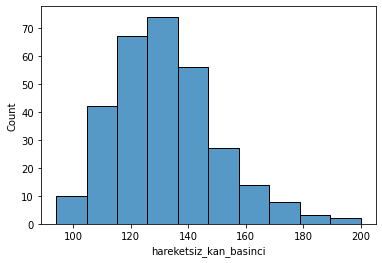

In [22]:
sns.histplot(data=veri,x="hareketsiz_kan_basinci",bins=10)
plt.show()

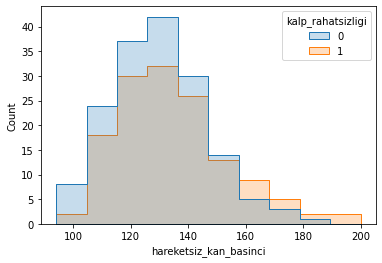

In [24]:
sns.histplot(data=veri,x="hareketsiz_kan_basinci",bins=10,hue="kalp_rahatsizligi",element="step")
plt.show()

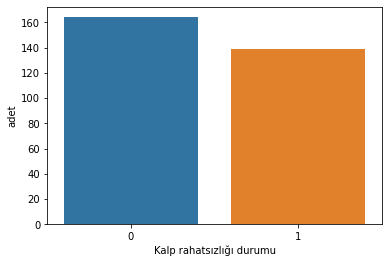

In [25]:
sns.countplot(data=veri,x="kalp_rahatsizligi")
plt.xlabel("Kalp rahatsızlığı durumu")
plt.ylabel("adet")
plt.show()

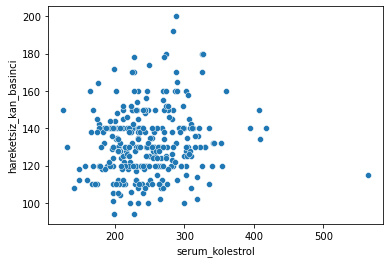

In [26]:
sns.scatterplot(data=veri,x="serum_kolestrol",y="hareketsiz_kan_basinci")
plt.show()

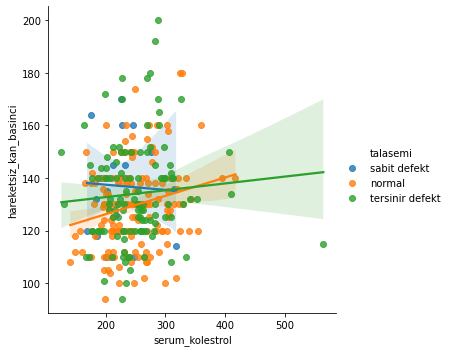

In [29]:
sns.lmplot(data=veri,x="serum_kolestrol",y="hareketsiz_kan_basinci",hue="talasemi")
plt.show()

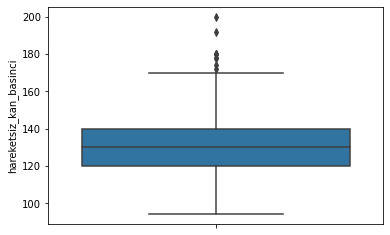

In [31]:
sns.boxplot(data=veri,y="hareketsiz_kan_basinci")
plt.show()

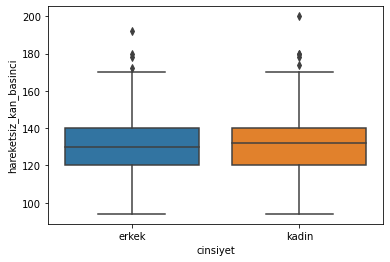

In [33]:
sns.boxplot(data=veri,y="hareketsiz_kan_basinci",x="cinsiyet")
plt.show()

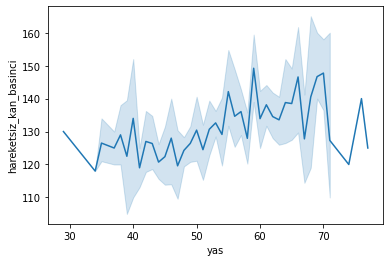

In [34]:
sns.lineplot(data=veri,x="yas",y="hareketsiz_kan_basinci")
plt.show()

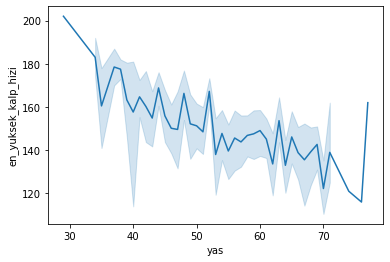

In [35]:
sns.lineplot(data=veri,x="yas",y="en_yuksek_kalp_hizi")
plt.show()

In [36]:
veri.corr()

,yas,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,buyuk_damarlar,kalp_rahatsizligi
yas,1.000000,0.284946,0.208950,0.118530,-0.393806,0.091661,0.203805,0.362605,0.223120
hareketsiz_kan_basinci,0.284946,1.000000,0.130120,0.175340,-0.045351,0.064762,0.189171,0.098773,0.150825
serum_kolestrol,0.208950,0.130120,1.000000,0.009841,-0.003432,0.061310,0.046564,0.119000,0.085164
aclik_kan_sekeri,0.118530,0.175340,0.009841,1.000000,-0.007854,0.025665,0.005747,0.145478,0.025264
en_yuksek_kalp_hizi,-0.393806,-0.045351,-0.003432,-0.007854,1.000000,-0.378103,-0.343085,-0.264246,-0.417167
anjin_bagli_egsersiz,0.091661,0.064762,0.061310,0.025665,-0.378103,1.000000,0.288223,0.145570,0.431894
st_depresyonu,0.203805,0.189171,0.046564,0.005747,-0.343085,0.288223,1.000000,0.295832,0.424510
buyuk_damarlar,0.362605,0.098773,0.119000,0.145478,-0.264246,0.145570,0.295832,1.000000,0.460442
kalp_rahatsizligi,0.223120,0.150825,0.085164,0.025264,-0.417167,0.431894,0.424510,0.460442,1.000000


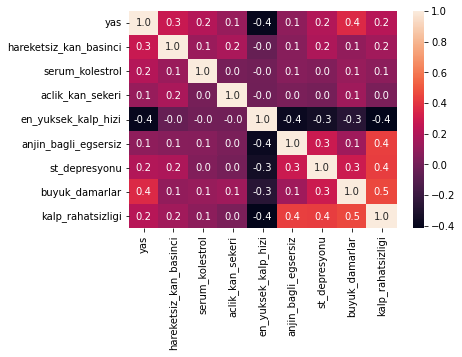

In [39]:
sns.heatmap(data=veri.corr(),annot=True,fmt="0.1f")
plt.show()